In [1]:
import pandas as pd
import os

# Replace with actual paths
domestic_folder = r"C:\Users\guggi\OneDrive\Desktop\Python DA Projects\Telangana Tourism Dashboard\domestic_visitors"
foreign_folder = r"C:\Users\guggi\OneDrive\Desktop\Python DA Projects\Telangana Tourism Dashboard\foreign_visitors"

# Merge CSV files for domestic visitors
domestic_files = [os.path.join(domestic_folder, file) for file in os.listdir(domestic_folder) if file.endswith(".csv")]
domestic_df = pd.concat([pd.read_csv(file) for file in domestic_files])

# Merge CSV files for foreign visitors
foreign_files = [os.path.join(foreign_folder, file) for file in os.listdir(foreign_folder) if file.endswith(".csv")]
foreign_df = pd.concat([pd.read_csv(file) for file in foreign_files])

# Save merged datasets
domestic_df.to_csv("domestic_visitors.csv", index=False)
foreign_df.to_csv("foreign_visitors.csv", index=False)

print("Data merged successfully!")

# Display first 10 rows of merged dataset
print("\nFirst 10 rows of Domestic Visitors Data:")
print(domestic_df.head(10))

print("\nFirst 10 rows of Foreign Visitors Data:")
print(foreign_df.head(10))


Data merged successfully!

First 10 rows of Domestic Visitors Data:
   district        date      month  year visitors
0  Adilabad  01-01-2016    January  2016   792136
1  Adilabad  01-02-2016   February  2016   937820
2  Adilabad  01-03-2016      March  2016   582946
3  Adilabad  01-04-2016      April  2016   341948
4  Adilabad  01-05-2016        May  2016   252887
5  Adilabad  01-06-2016       June  2016   368237
6  Adilabad  01-07-2016       July  2016   447562
7  Adilabad  01-08-2016     August  2016   614285
8  Adilabad  01-09-2016  September  2016   491279
9  Adilabad  01-10-2016    October  2016    94184

First 10 rows of Foreign Visitors Data:
   district        date      month  year visitors
0  Adilabad  01-01-2016    January  2016        2
1  Adilabad  01-02-2016   February  2016        0
2  Adilabad  01-03-2016      March  2016        2
3  Adilabad  01-04-2016      April  2016        0
4  Adilabad  01-05-2016        May  2016        0
5  Adilabad  01-06-2016       June  2016 

In [2]:
print(domestic_df.dtypes)


district    object
date        object
month       object
year         int64
visitors    object
dtype: object


In [3]:
print(foreign_df.dtypes)

district    object
date        object
month       object
year         int64
visitors    object
dtype: object


In [4]:
# Ensure 'visitors' column is numeric
domestic_df["visitors"] = pd.to_numeric(domestic_df["visitors"], errors="coerce")
foreign_df["visitors"] = pd.to_numeric(foreign_df["visitors"], errors="coerce")

# Drop any NaN values in 'visitors' column (optional)
domestic_df = domestic_df.dropna(subset=["visitors"])
foreign_df = foreign_df.dropna(subset=["visitors"])

print("Data cleaning completed successfully!")


Data cleaning completed successfully!


In [5]:
top_domestic = domestic_df.groupby("district")["visitors"].sum().nlargest(10)
print("Top 10 Domestic Visitor Districts:", top_domestic)


Top 10 Domestic Visitor Districts: district
Hyderabad                   83900960.0
Rajanna Sircilla            41763276.0
Warangal (Urban)            30726603.0
Yadadri Bhongir             26893080.0
Bhadradri Kothagudem        21600962.0
Medak                       20542639.0
Jayashankar Bhoopalpally    19632865.0
Mahbubnagar                 17180118.0
Nirmal                      13315796.0
Jagtial                     11303514.0
Name: visitors, dtype: float64


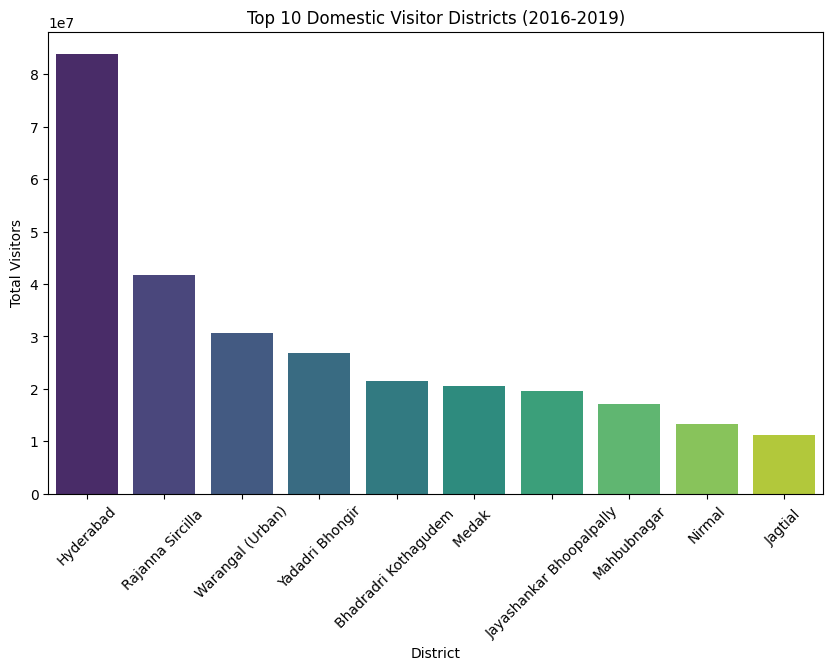

In [14]:
# Plot bar chart for Top 10 Domestic Visitor Districts.
# Create a DataFrame from the top domestic visitor districts for better handling
df_top_domestic = top_domestic.reset_index()  # Convert Series to DataFrame

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_domestic, x="district", y="visitors", hue="district", dodge=False, legend=False, palette="viridis")

plt.title("Top 10 Domestic Visitor Districts (2016-2019)")
plt.xlabel("District")
plt.ylabel("Total Visitors")
plt.xticks(rotation=45)
plt.show()


In [6]:
def calculate_cagr(data):
    start_year = data[data["year"] == 2016]["visitors"].sum()
    end_year = data[data["year"] == 2019]["visitors"].sum()
    
    # Handle zero division and missing data
    if start_year == 0 or pd.isna(start_year) or pd.isna(end_year):
        return None  # Ignore districts with missing or zero visitor data
    
    # Compute CAGR formula
    cagr = ((end_year / start_year) ** (1/3)) - 1
    return round(cagr * 100, 2)  # Convert to percentage

# Apply `.apply()` correctly with `include_groups=False`
cagr_domestic = domestic_df.groupby("district", group_keys=False).apply(calculate_cagr, include_groups=False).dropna().sort_values(ascending=False)

print("Top 3 Growing Domestic Districts:\n", cagr_domestic.head(3))
print("Bottom 3 Declining Domestic Districts:\n", cagr_domestic.tail(3))


Top 3 Growing Domestic Districts:
 district
Mancherial               225.80
Warangal (Rural)         163.15
Bhadradri Kothagudem     143.39
dtype: float64
Bottom 3 Declining Domestic Districts:
 district
Warangal (Urban)   -58.86
Nalgonda           -71.13
Karimnagar         -79.63
dtype: float64


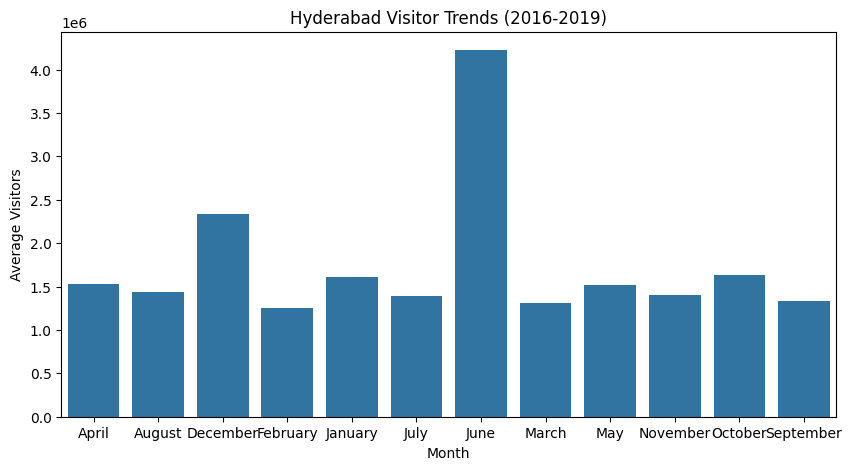

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

hyderabad_data = domestic_df[domestic_df["district"] == "Hyderabad"].groupby("month")["visitors"].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=hyderabad_data.index, y=hyderabad_data.values)
plt.title("Hyderabad Visitor Trends (2016-2019)")
plt.xlabel("Month")
plt.ylabel("Average Visitors")
plt.show()


In [10]:
# Ensure 'visitor_ratio' is numeric
merged_df["visitor_ratio"] = pd.to_numeric(merged_df["visitor_ratio"], errors="coerce")

# Drop NaN values in 'visitor_ratio' column
merged_df = merged_df.dropna(subset=["visitor_ratio"])

# Compute top and bottom districts based on visitor ratio
top_ratio = merged_df.groupby("district")["visitor_ratio"].mean().nlargest(3)
bottom_ratio = merged_df.groupby("district")["visitor_ratio"].mean().nsmallest(3)

print("Top 3 Domestic-Foreign Ratio Districts:\n", top_ratio)
print("Bottom 3 Domestic-Foreign Ratio Districts:\n", bottom_ratio)


Top 3 Domestic-Foreign Ratio Districts:
 district
Nirmal                      156955.000000
Adilabad                    125931.622222
Jayashankar Bhoopalpally     13113.959759
Name: visitor_ratio, dtype: float64
Bottom 3 Domestic-Foreign Ratio Districts:
 district
Hyderabad            101.009005
Warangal (Rural)     470.499588
Nizamabad           2454.000000
Name: visitor_ratio, dtype: float64


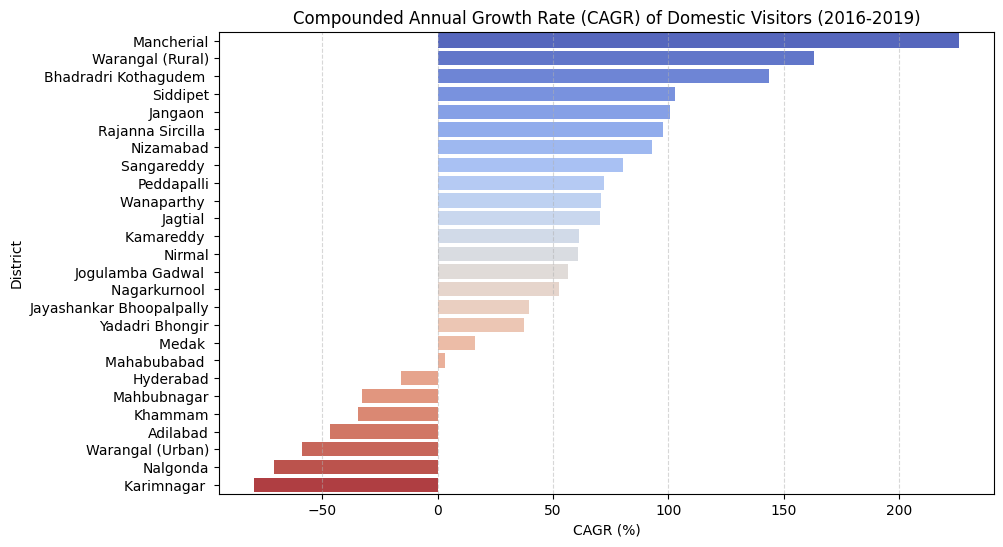

In [26]:
#Horizontal Bar Chart – CAGR for Districts
import matplotlib.pyplot as plt
import seaborn as sns

# Convert CAGR data into a DataFrame and rename columns correctly
df_cagr = cagr_domestic.reset_index()  # Convert Series to DataFrame
df_cagr.columns = ["district", "CAGR (%)"]  # Explicitly rename columns

# Ensure CAGR values are numeric
df_cagr["CAGR (%)"] = pd.to_numeric(df_cagr["CAGR (%)"], errors="coerce")

# Sort data in descending order for clarity
df_cagr = df_cagr.sort_values(by="CAGR (%)", ascending=False)

# Plot horizontal bar chart with correct hue assignment
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cagr, y="district", x="CAGR (%)", hue="district", legend=False, palette="coolwarm")

plt.title("Compounded Annual Growth Rate (CAGR) of Domestic Visitors (2016-2019)")
plt.xlabel("CAGR (%)")
plt.ylabel("District")
plt.grid(axis="x", linestyle="--", alpha=0.5)  # Add grid lines for clarity
plt.show()


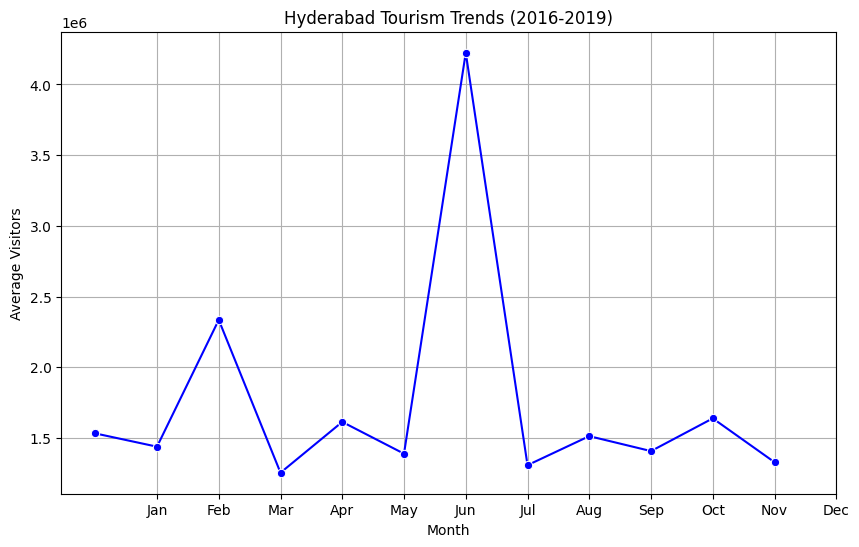

In [25]:
#Line Chart – Peak & Low Seasons for Hyderabad
plt.figure(figsize=(10, 6))
sns.lineplot(x=hyderabad_data.index, y=hyderabad_data.values, marker="o", color="blue")

plt.title("Hyderabad Tourism Trends (2016-2019)")
plt.xlabel("Month")
plt.ylabel("Average Visitors")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

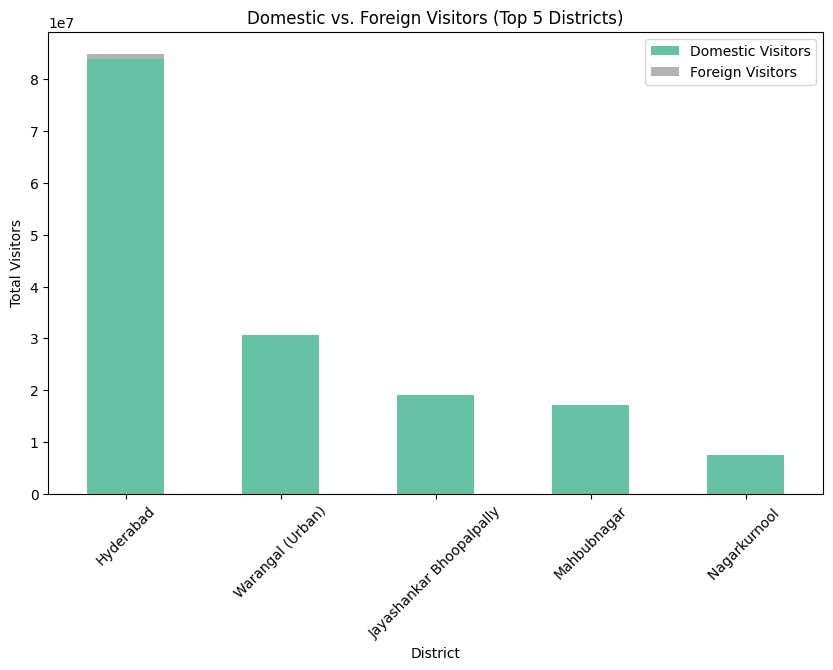

In [27]:
#Stacked Bar Chart – Domestic-to-Foreign Visitor Ratio
plt.figure(figsize=(10, 6))
df_ratio = merged_df.groupby("district")[["visitors_domestic", "visitors_foreign"]].sum().nlargest(5, "visitors_domestic")

df_ratio.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Domestic vs. Foreign Visitors (Top 5 Districts)")
plt.xlabel("District")
plt.ylabel("Total Visitors")
plt.legend(["Domestic Visitors", "Foreign Visitors"])
plt.xticks(rotation=45)
plt.show()


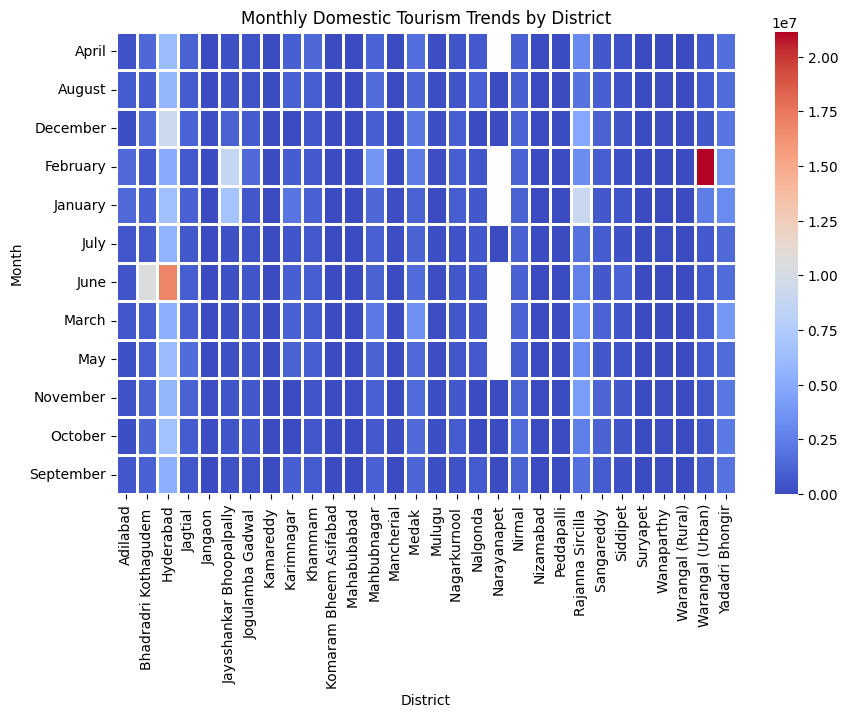

In [28]:
#Telangana Tourism Heatmap
plt.figure(figsize=(10,6))
heatmap_data = domestic_df.pivot_table(index="month", columns="district", values="visitors", aggfunc="sum")
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=1)

plt.title("Monthly Domestic Tourism Trends by District")
plt.xlabel("District")
plt.ylabel("Month")
plt.show()
